In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import geopandas as gpd
import seaborn as sns
import scipy.stats as stats

In [12]:
actors = pd.read_csv("./main_data/actors.csv")
countries = pd.read_csv("./main_data/countries.csv")
crew = pd.read_csv("./main_data/crew.csv")
genres = pd.read_csv("./main_data/genres.csv")
languages = pd.read_csv("./main_data/languages.csv")
movies = pd.read_csv("./main_data/movies.csv")
releases = pd.read_csv("./main_data/releases.csv")
rotten_tomatoes_review = pd.read_csv("./main_data/rotten_tomatoes_reviews.csv")
studios = pd.read_csv("./main_data/studios.csv")
the_oscar_awards = pd.read_csv("./main_data/the_oscar_awards.csv")

In [13]:
# Pulizia del dataset actors
actors = pd.read_csv("./main_data/actors.csv")

nomiNulli = actors["name"].isna().sum()
ruoliNulli = actors["role"].isna().sum()
righe_entrambi_nan = actors[actors["name"].isna() & actors["role"].isna()]

print(f"Numero di NaN nella colonna 'name' sono: {nomiNulli}")
print(f"Numero di NaN nella colonna 'role' sono: {ruoliNulli}")
print(f"Numero di righe con 'name' E 'role' NaN (verranno eliminate): {len(righe_entrambi_nan)}")

# Rimuovi righe dove sia 'name' che 'role' sono NaN
actors.dropna(subset=["name", "role"], how="all", inplace=True)

name_nan_residui = actors["name"].isna().sum()
role_nan_residui = actors["role"].isna().sum()

print(f"Numero di 'name' NaN residui prima della sostituzione: {name_nan_residui}")
print(f"Numero di 'role' NaN residui prima della sostituzione: {role_nan_residui}")

# Sostituisci i NaN residui con 'Sconosciuto'
actors["name"] = actors["name"].fillna("Sconosciuto")
actors["role"] = actors["role"].fillna("Sconosciuto")

name_sconosciuto = (actors["name"] == "Sconosciuto").sum()
role_sconosciuto = (actors["role"] == "Sconosciuto").sum()

print(f"Numero di 'name' settati a 'Sconosciuto': {name_sconosciuto}")
print(f"Numero di 'role' settati a 'Sconosciuto': {role_sconosciuto}")

# Duplicati
duplicatiMask = actors.duplicated(subset=["id", "name", "role"], keep=False)
numeroDuplicati = duplicatiMask.sum()

print(f"Numero di duplicati in actors: {numeroDuplicati}")

# Elimina duplicati
actors.drop_duplicates(subset=["id", "name", "role"], inplace=True)

# Controllo: righe con valori non stringa (escludendo la colonna 'id')
non_string_mask = actors.drop(columns="id").map(lambda x: not isinstance(x, str))
righe_con_errori = actors[non_string_mask.any(axis=1)]

print(f"Numero di righe con valori non stringa (escluse 'id'): {len(righe_con_errori)}")
if not righe_con_errori.empty:
    print(righe_con_errori.head(10))

Numero di NaN nella colonna 'name' sono: 4
Numero di NaN nella colonna 'role' sono: 1361559
Numero di righe con 'name' E 'role' NaN (verranno eliminate): 2
Numero di 'name' NaN residui prima della sostituzione: 2
Numero di 'role' NaN residui prima della sostituzione: 1361557
Numero di 'name' settati a 'Sconosciuto': 2
Numero di 'role' settati a 'Sconosciuto': 1361559
Numero di duplicati in actors: 1826
Numero di righe con valori non stringa (escluse 'id'): 0


In [14]:
# Pulizia del dataset crew
crew = pd.read_csv("./main_data/crew.csv")

nomiNulli = crew["name"].isna().sum()
ruoliNulli = crew["role"].isna().sum()
righe_entrambi_nan = crew[crew["name"].isna() & crew["role"].isna()]

print(f"Numero di NaN nella colonna 'name' sono: {nomiNulli}")
print(f"Numero di NaN nella colonna 'role' sono: {ruoliNulli}")
print(f"Numero di righe con 'name' E 'role' NaN (verranno eliminate): {len(righe_entrambi_nan)}")

# Rimuovi righe dove sia 'name' che 'role' sono NaN
crew.dropna(subset=["name", "role"], how="all", inplace=True)

name_nan_residui = crew["name"].isna().sum()
role_nan_residui = crew["role"].isna().sum()

print(f"Numero di 'name' NaN residui prima della sostituzione: {name_nan_residui}")
print(f"Numero di 'role' NaN residui prima della sostituzione: {role_nan_residui}")

# Sostituisci i NaN residui con 'Sconosciuto'
crew["name"] = crew["name"].fillna("Sconosciuto")
crew["role"] = crew["role"].fillna("Sconosciuto")

name_sconosciuto = (crew["name"] == "Sconosciuto").sum()
role_sconosciuto = (crew["role"] == "Sconosciuto").sum()

print(f"Numero di 'name' settati a 'Sconosciuto': {name_sconosciuto}")
print(f"Numero di 'role' settati a 'Sconosciuto': {role_sconosciuto}")

# Duplicati
duplicatiMask = crew.duplicated(subset=["id", "name", "role"], keep=False)
duplicati = duplicatiMask.sum()

print(f"Numero di duplicati in crew: {duplicati}")

crew.drop_duplicates(subset=["id", "name", "role"],inplace=True)

# Controllo: righe con valori non stringa (escludendo la colonna 'id')
non_string_mask = crew.drop(columns="id").map(lambda x: not isinstance(x, str))
righe_con_errori = crew[non_string_mask.any(axis=1)]

print(f"Numero di righe con valori non stringa (escluse 'id'): {len(righe_con_errori)}")
if not righe_con_errori.empty:
    print(righe_con_errori.head(10))

Numero di NaN nella colonna 'name' sono: 1
Numero di NaN nella colonna 'role' sono: 0
Numero di righe con 'name' E 'role' NaN (verranno eliminate): 0
Numero di 'name' NaN residui prima della sostituzione: 1
Numero di 'role' NaN residui prima della sostituzione: 0
Numero di 'name' settati a 'Sconosciuto': 1
Numero di 'role' settati a 'Sconosciuto': 0
Numero di duplicati in crew: 2496
Numero di righe con valori non stringa (escluse 'id'): 0


In [15]:
#pulizia dataset Generi
genres = pd.read_csv("./main_data/genres.csv")

generiNulli = genres['genre'].isna().sum()
print(f"Numero di NaN nella colonna 'genre' sono: {nomiNulli}")
genres.dropna(subset=["genre"],inplace=True)
genres.drop_duplicates(subset=["id", "genre"],inplace=True)

# 1. Uniforma tutto in minuscolo
genres['genre'] = genres['genre'].str.lower()

# 2. Rimuovi spazi bianchi residui (prima e dopo)
genres['genre'] = genres['genre'].str.strip()

# 3. Correggi varianti e errori di scrittura con una mappatura di sostituzione
correzioni = {
    'scifi': 'science fiction',
    'sci-fi': 'science fiction',
    'documentaries': 'documentary',
    'tv movies': 'tv movie'
}

genres['genre'] = genres['genre'].replace(correzioni)

# 4. Visualizza i generi unici finali per controllo
print("Generi unici dopo pulizia:")
print(genres['genre'].unique())

Numero di NaN nella colonna 'genre' sono: 1
Generi unici dopo pulizia:
['comedy' 'adventure' 'thriller' 'drama' 'science fiction' 'action'
 'music' 'romance' 'history' 'crime' 'animation' 'mystery' 'horror'
 'family' 'fantasy' 'war' 'western' 'tv movie' 'documentary']


In [16]:
#pulizia dataset lingue
languages = pd.read_csv("./main_data/languages.csv")

# 1. Se type è NaN ma language c'è, metti type = "language"
languages.loc[languages['type'].isna() & languages['language'].notna(), 'type'] = 'language'

# 2. Droppa righe dove manca language (NaN) o manca sia type che language
languages.dropna(subset=['language'], inplace=True)
languages.dropna(subset=['type'], inplace=True)

# 3. Rimuovi duplicati perfetti su id, type, language (prima di uniformare)
languages.drop_duplicates(subset=['id', 'type', 'language'], inplace=True)

# 4. Uniforma: strip spazi e lowercase su 'type' e 'language'
languages['type'] = languages['type'].str.strip().str.lower()
languages['language'] = languages['language'].str.strip().str.lower()

# 5. Correzioni con mapping per 'type' e 'language'
type_corrections = {
    'spoken language': 'spoken language',
    'language': 'language',
    'primary language': 'primary language',
    # eventuali altre correzioni o sinonimi
}
languages['type'] = languages['type'].replace(type_corrections)


languages['language'] = languages['language'].str.replace('\xa0', ' ', regex=False).str.strip()

# Dividi le stringhe con virgole in liste
languages['language'] = languages['language'].str.split(',')
languages = languages.explode('language')
languages['language'] = languages['language'].str.strip()


language_corrections = {
    'eng': 'english',
    'haitian creole': 'haitian creole',
    'persian (farsi)': 'persian',
    'hebrew (modern)': 'hebrew',
    'greek (modern)': 'greek',
    'tibetan standard': 'tibetan',
    'tibetan central': 'tibetan',
    'chewa': 'chichewa',
    'nyanja': 'chichewa',
    'gaelic': 'scottish gaelic',
    'navaho': 'navajo',
    'chuang': 'zhuang',
    'interlingue': 'interlingua',
    'ojibwa': 'ojibwe',
    'puular': 'fula',
    'pular': 'fula',
    'fulah': 'fula',
    'pulaar': 'fula',
    'old church slavonic': 'church slavonic',
    'old bulgarian': 'church slavonic',
    'pushto': 'pashto',
    'ossetic': 'ossetian',
    'limburgan': 'limburgish',
    'limburger': 'limburgish',
    'eastern panjabi': 'eastern punjabi',
    'kuanyama': 'kwanyama',
    "sanskrit (saṁskṛta)": "sanskrit",
    "divehi": "dhivehi",
    'tonga (tonga islands)': 'tonga',
    # eventuali altre correzioni o sinonimi
}
languages['language'] = languages['language'].replace(language_corrections)

# 6. (opzionale) Mostra valori unici per controllo finale
print("Valori unici in 'type':", languages['type'].unique())
print("Valori unici in 'language':", languages['language'].unique())

Valori unici in 'type': ['language' 'primary language' 'spoken language']
Valori unici in 'language': ['english' 'korean' 'german' 'cantonese' 'chinese' 'dutch' 'spanish'
 'french' 'japanese' 'swedish' 'swahili' 'portuguese' 'hindi' 'italian'
 'tagalog' 'xhosa' 'latin' 'russian' 'finnish' 'hungarian' 'somali'
 'romanian' 'vietnamese' 'turkish' 'czech' 'estonian' 'persian' 'urdu'
 'arabic' 'polish' 'hebrew' 'greek' 'yiddish' 'norwegian' 'haitian'
 'haitian creole' 'khmer' 'nepali' 'akan' 'icelandic' 'malay'
 'eastern punjabi' 'georgian' 'indonesian' 'belarusian' 'danish' 'tamil'
 'sinhalese' 'sinhala' 'tibetan' 'central' 'armenian' 'thai' 'telugu'
 'scottish gaelic' 'northern sami' 'esperanto' 'bulgarian' 'afrikaans'
 'chichewa' 'southern sotho' 'zulu' 'irish' 'breton' 'croatian' 'bengali'
 'bangla' 'welsh' 'navajo' 'albanian' 'inuktitut' 'catalan' 'quechua'
 'azerbaijani' 'samoan' 'ukrainian' 'mongolian' 'māori' 'tatar' 'mayan'
 'fula' 'slovak' 'lithuanian' 'cree' 'lao' 'galician' 'amh

In [17]:
# Pulizia del dataset movies
# Eliminiamo gli id duplicati
movies.drop_duplicates(subset=movies.columns.difference(['id']), keep='first',inplace=True)

# Eliminiamo i dulicati che hanno id diverso ma tutti gli altri campi uguali
movies.drop_duplicates(subset=["name","date","tagline","description","minutes","rating"],inplace=True)

# Contiamo, per farci un'idea, i campi NaN
nomiNulli = movies["name"].isna().sum()
print(f"Numero di NaN nella colonna 'name': {nomiNulli}")
dateNulle = movies["date"].isna().sum()
print(f"Numero di NaN nella colonna 'date': {dateNulle}")
minutiNulli = movies["minutes"].isna().sum()
print(f"Numero di NaN nella colonna 'minute': {minutiNulli}")
ratingNullo = movies["rating"].isna().sum()
print(f"Numero di NaN nella colonna 'rating': {ratingNullo}")



# Eliminiamo i 2 dati sui film NaN
movies.dropna(subset=["name"],inplace=True)
nomiNulli = movies["name"].isna().sum()
print(f"Numero di NaN nella colonna 'name': {nomiNulli}")

Numero di NaN nella colonna 'name': 5
Numero di NaN nella colonna 'date': 89827
Numero di NaN nella colonna 'minute': 179090
Numero di NaN nella colonna 'rating': 846551
Numero di NaN nella colonna 'name': 0


In [18]:
non_nan_date_movies = movies["date"].dropna()
# Controlliamo se tutti i valori non NaN sono compresi tra 1888 e 2024
are_all_in_range = non_nan_date_movies.between(1877, 2025).all()

if are_all_in_range:
    print("Tutti i valori non NaN nella colonna 'date' sono compresi tra 1888 e 2024.")
else:
    print("Alcuni valori non NaN nella colonna 'date' NON rientrano nel range 1888-2024.")

#############

# Troviamo i valori non NaN che non sono compresi tra 1888 e 2025
out_of_range = non_nan_date_movies[~non_nan_date_movies.between(1877, 2024)]

print("Valori non NaN che NON rientrano nel range 1888-2024:")
print(out_of_range)

Alcuni valori non NaN nella colonna 'date' NON rientrano nel range 1888-2024.
Valori non NaN che NON rientrano nel range 1888-2024:
3657      2025.0
4679      2026.0
7227      2025.0
7441      2025.0
7787      2025.0
           ...  
932230    2025.0
940009    2030.0
940010    2025.0
940011    2025.0
940012    2025.0
Name: date, Length: 416, dtype: float64


In [19]:
# Pulizia del dataset studios
import re
from unidecode import unidecode

# Carica il dataset

# Rimuove righe con 'studio' mancante
studios.dropna(subset=["studio"], inplace=True)

# Funzione per singolarizzare
def singularize_in_string(name):
    plurals = {
        "films": "film",
        "productions": "production",
        "studios": "studio",
        "movies": "movie",
        "pictures": "picture",
        "entertainments": "entertainment",
        "distributions": "distribution",
        "animations": "animation",
        "creations": "creation",
        "works": "work",
        "industries": "industry",
        "partners": "partner",
        "associates": "associate",
        "prod": "production",
        "ent": "entertainment",
        "assoc": "associate"
    }
    for plural, singular in plurals.items():
        name = re.sub(plural, singular, name)
    return name

# Funzione di pulizia
def clean_studio_name(name):
    name = name.lower().strip()
    name = unidecode(name)
    name = re.sub(r'[.,;:!&?"\'-]', ' ', name)
    name = re.sub(r'\s+', ' ', name).strip()
    name = singularize_in_string(name)
    return name

# Pulisce la colonna 'studio' direttamente
studios["studio"] = studios["studio"].apply(clean_studio_name)

# Rimuove i duplicati (mantenendo la prima occorrenza con id)
studios.drop_duplicates(subset=["studio"], inplace=True)

# Reset degli indici se vuoi
studios.reset_index(drop=True, inplace=True)

# Verifica finale
print(f"Numero di nomi studio unici dopo pulizia: {len(studios)}")

Numero di nomi studio unici dopo pulizia: 158746


In [20]:
#pulizia del dataset releases
releases.drop_duplicates(subset=["id","country","date","type","rating"])

,id,country,date,type,rating
0,1000001,Andorra,2023-07-21,Theatrical,NaN
1,1000001,Argentina,2023-07-20,Theatrical,ATP
2,1000001,Australia,2023-07-19,Theatrical,PG
3,1000001,Australia,2023-10-01,Digital,PG
4,1000001,Austria,2023-07-20,Theatrical,NaN
...,...,...,...,...,...
1332777,1940967,USA,1909-01-01,Theatrical,NaN
1332778,1940968,Sweden,1908-11-11,Theatrical,NaN
1332779,1940969,France,1902-01-01,Theatrical,NaN
1332780,1940970,France,1902-01-01,Theatrical,NaN


In [21]:
 #pulizia dati

In [22]:
 #pulizia dati

In [23]:
 #pulizia dati

In [24]:
 #pulizia dati

In [25]:
 #pulizia dati

In [26]:
#attori con più film

import pandas as pd
import plotly.express as px

# 1. Conta il numero di film per attore (usando id unici)
actor_film_counts = (
    actors.groupby('name')['id']
    .nunique()
    .reset_index(name='Numero di Film')
    .sort_values(by='Numero di Film', ascending=False)
)

# 2. Prendi i Top 10 attori
top_actors = actor_film_counts.head(30)

# 3. Crea il grafico bar con Plotly
fig = px.bar(
    top_actors,
    x='name',
    y='Numero di Film',
    text='Numero di Film',
    title='Top 10 Attori con più Film',
    labels={'name': 'Attore', 'Numero di Film': 'Film Realizzati'},
    template='plotly_white'
)

# 4. Migliora la leggibilità del grafico
fig.update_traces(
    textposition='outside',
    marker_color='mediumseagreen'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Numero di Film',
    margin=dict(t=80),
    height=600
)

# 5. Mostra il grafico
fig.show()


In [27]:
import pandas as pd
import plotly.express as px

# 1. Conta i film unici per ogni attore e ruolo
role_counts = (
    actors.groupby(['name', 'role'])['id']
    .nunique()
    .reset_index(name='count')
)

# 2. Tieni solo i ruoli ripetuti almeno 2 volte
repeated_roles = role_counts[role_counts['count'] >= 2].copy()

# 3. Calcola il totale di ripetizioni per ogni attore
total_repeats = (
    repeated_roles.groupby('name')['count']
    .sum()
    .reset_index(name='Totale Ripetizioni')
)

# 4. Prendi i top 10 attori
top_actors = total_repeats.sort_values(by='Totale Ripetizioni', ascending=False).head(10)

# 5. Prepara i ruoli ripetuti per ogni attore
tooltip_df = repeated_roles[repeated_roles['name'].isin(top_actors['name'])].copy()
tooltip_df['ruolo_info'] = tooltip_df['role'] + ': ' + tooltip_df['count'].astype(str) + ' volte'

# 6. Aggrega ruoli per tooltip
tooltip_texts = (
    tooltip_df.groupby('name')['ruolo_info']
    .apply(lambda x: '<br>'.join(x))
    .reset_index(name='Ruoli Ripetuti')
)

# 7. Unisci i tooltip con il dataset dei top attori
plot_df = pd.merge(top_actors, tooltip_texts, on='name', how='left')

# 8. Riempi eventuali valori mancanti
plot_df['Ruoli Ripetuti'] = plot_df['Ruoli Ripetuti'].fillna('Nessun ruolo ripetuto')

# 9. Crea bar chart Plotly
fig = px.bar(
    plot_df,
    x='name',
    y='Totale Ripetizioni',
    text='Totale Ripetizioni',
    hover_data={'Ruoli Ripetuti': True},
    labels={'name': 'Attore'},
    title='Attori che hanno interpretato più volte lo stesso ruolo',
    template='plotly_white'
)

fig.update_traces(
    textposition='outside',
    marker_color='mediumseagreen'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    margin=dict(t=100)
)

fig.show()


In [34]:
import pandas as pd
import plotly.express as px

# === Caricamento dati ===


# === Estrai anno (anche da date strane) ===
movies["year"] = movies["date"].astype(str).str.extract(r"(\d{4})")
movies["year"] = pd.to_numeric(movies["year"], errors="coerce")

# === Unisci attori con anno del film ===
actors_with_year = actors.merge(movies[["id", "year"]], on="id", how="left")
actors_with_year = actors_with_year.dropna(subset=["year"])  # elimina righe senza anno

# === Conta attori per ogni film ===
actor_counts = actors_with_year.groupby(["year", "id"]).size().reset_index(name="num_actors")

# === Calcola media attori per anno ===
avg_actors_per_year = actor_counts.groupby("year")["num_actors"].mean().reset_index()
avg_actors_per_year["num_actors"] = avg_actors_per_year["num_actors"].round(2)

# === Filtra solo anni divisibili per 10 (es. 1950, 1960...) ===
avg_actors_per_year = avg_actors_per_year[avg_actors_per_year["year"] % 10 == 0]

# === Plot con Plotly ===
fig = px.line(
    avg_actors_per_year,
    x="year",
    y="num_actors",
    markers=True,
    title="Numero medio di attori per film (ogni 10 anni)",
    labels={"year": "Anno", "num_actors": "Media attori per film"},
    text="num_actors"
)

fig.update_traces(textposition="top center")
fig.update_layout(
    xaxis=dict(dtick=10),
    hovermode="x unified"
)

fig.show()


In [15]:
#registi con più film
import pandas as pd
import plotly.express as px

# 1. Filtra solo i registi
director_roles = ['director', 'regista']
crew_directors = crew[crew['role'].str.lower().isin(director_roles)]

# 2. Conta il numero di film unici per ogni regista
director_counts = (
    crew_directors.groupby('name')['id']
    .nunique()
    .reset_index(name='Numero di Film')
)

# 3. Prendi i top 20 registi
top_directors = director_counts.sort_values(by='Numero di Film', ascending=False).head(30)

# 4. Crea bar chart Plotly
fig = px.bar(
    top_directors,
    x='name',
    y='Numero di Film',
    text='Numero di Film',
    title='Top 20 Registi con più film',
    labels={'name': 'Regista'},
    template='plotly_white'
)

fig.update_traces(
    textposition='outside',
    marker_color='indianred'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    margin=dict(t=100)
)

fig.show()


In [16]:
import pandas as pd
import plotly.express as px

# 1. Filtra solo vincitori nella categoria "DIRECTING"
winners_directing = the_oscar_awards[
    (the_oscar_awards['winner'] == True) &
    (the_oscar_awards['category'].str.upper() == "DIRECTING")
]

# 2. Conta il numero di premi vinti per regista
director_awards = winners_directing['name'].value_counts().reset_index()
director_awards.columns = ['director', 'num_awards']

# 3. Prendi i top 20 registi più premiati
top_directors = director_awards.head(20)

# 4. Crea bar chart con Plotly
fig = px.bar(
    top_directors,
    x='director',
    y='num_awards',
    text='num_awards',
    title='Top 20 registi con più premi Oscar per la regia',
    template='plotly_white',
    color='num_awards',
    color_continuous_scale='Plasma'
)

# 5. Miglioramenti estetici
fig.update_layout(
    xaxis_title='Regista',
    yaxis_title='Numero di Oscar per la regia',
    xaxis_tickangle=45,
    height=600,
    margin=dict(t=80, b=150)
)
fig.update_traces(textposition="outside")

# 6. Mostra grafico
fig.show()


In [18]:
import pandas as pd
import plotly.express as px

# 1. Filtra solo vincitori nella categoria "DIRECTING"
winners_directing = the_oscar_awards[
    (the_oscar_awards['category'].str.upper() == "DIRECTING")
]

# 2. Conta il numero di premi vinti per regista
director_awards = winners_directing['name'].value_counts().reset_index()
director_awards.columns = ['director', 'num_awards']

# 3. Prendi i top 20 registi più premiati
top_directors = director_awards.head(20)

# 4. Crea bar chart con Plotly
fig = px.bar(
    top_directors,
    x='director',
    y='num_awards',
    text='num_awards',
    title='Top 20 registi con più premi Oscar per la regia',
    template='plotly_white',
    color='num_awards',
    color_continuous_scale='Plasma'
)

# 5. Miglioramenti estetici
fig.update_layout(
    xaxis_title='Regista',
    yaxis_title='Numero di Oscar per la regia',
    xaxis_tickangle=45,
    height=600,
    margin=dict(t=80, b=150)
)
fig.update_traces(textposition="outside")

# 6. Mostra grafico
fig.show()


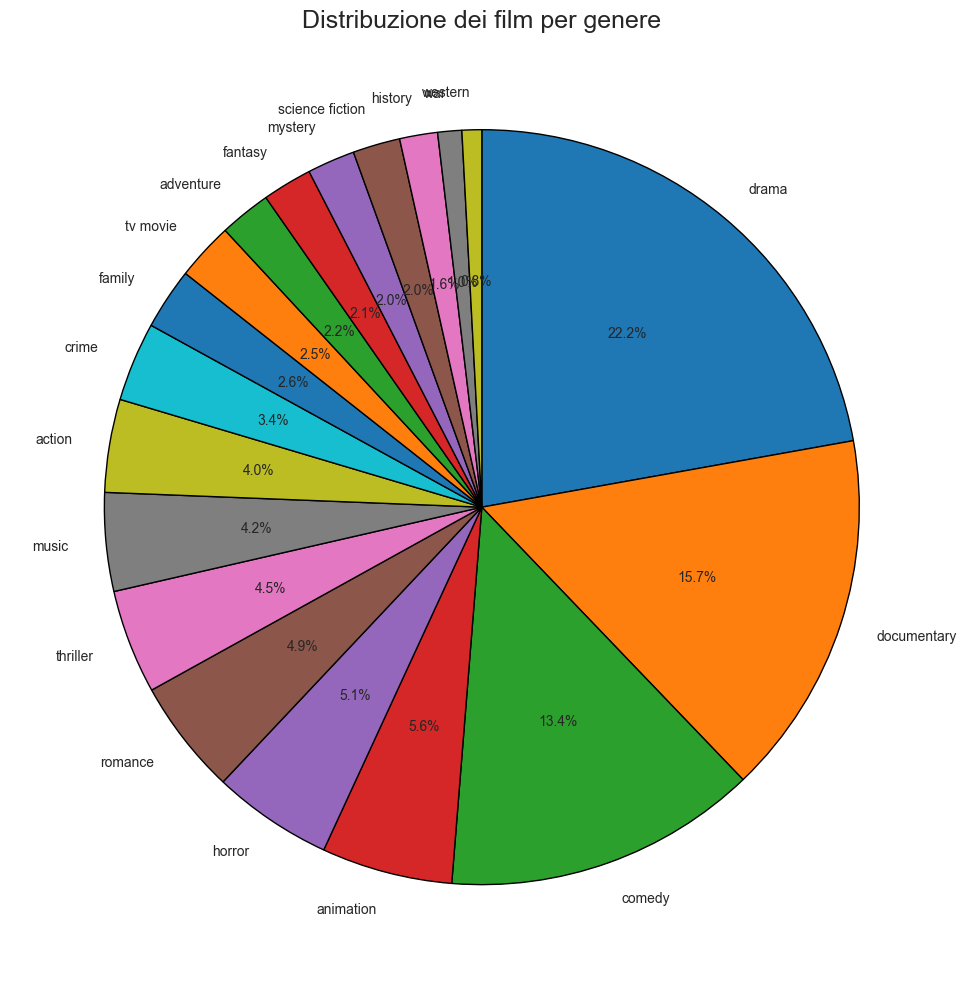

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Rimuove i duplicati in modo effettivo (serve l'assegnazione!)
genres_clean = genres.drop_duplicates(subset=["id", "genre"]).copy()

# Conta il numero di film per genere
genre_counts = genres_clean["genre"].value_counts()



# Plot
plt.figure(figsize=(10, 10))
genre_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribuzione dei film per genere", fontsize=18)
plt.ylabel('')  # Rimuove l'etichetta sull'asse Y
plt.tight_layout()
plt.show()


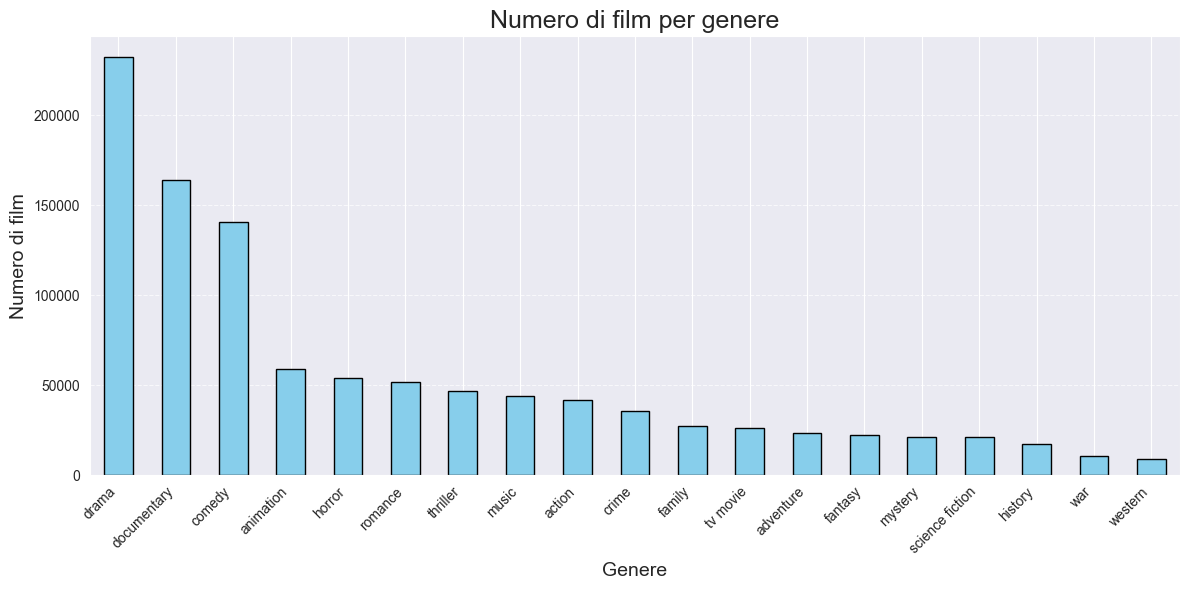

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Rimuove i duplicati in modo effettivo
genres_clean = genres.drop_duplicates(subset=["id", "genre"]).copy()

# Conta il numero di film per genere
genre_counts = genres_clean["genre"].value_counts()

# (Facoltativo) Raggruppa i generi minori in "Altro"
# threshold = 0.02
# total = genre_counts.sum()
# genre_counts_filtered = genre_counts[genre_counts / total >= threshold]
# other = genre_counts[genre_counts / total < threshold].sum()
# if other > 0:
#     genre_counts_filtered["Altro"] = other
# genre_counts = genre_counts_filtered

# Plot a barre
plt.figure(figsize=(12, 6))
genre_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Numero di film per genere", fontsize=18)
plt.xlabel("Genere", fontsize=14)
plt.ylabel("Numero di film", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [37]:
import plotly.express as px

# Aggiungiamo il genere ai film
df_movies_with_genres = pd.merge(movies, genres, on='id', how='inner')

# Filtriamo i film che hanno vinto un Oscar
df_oscars_winners = the_oscar_awards[the_oscar_awards['winner'] == True]

# Uniamo i film vincitori con il genere
df_winning_movies = pd.merge(
    df_oscars_winners,
    df_movies_with_genres,
    left_on=['film', 'year_film'],
    right_on=['name', 'date'],
    how='inner'
)

# Conta numero di Oscar per genere
oscar_counts = df_winning_movies['genre'].value_counts().reset_index()
oscar_counts.columns = ['Genere', 'Oscar Vinti']

# Bar chart interattivo con plotly
fig = px.bar(
    oscar_counts,
    x='Genere',
    y='Oscar Vinti',
    title='Distribuzione degli Oscar vinti per genere',
    text='Oscar Vinti',
    labels={'Oscar Vinti': 'Numero di Oscar', 'Genere': 'Genere'},
    template='plotly_white'
)

fig.update_traces(
    marker_color='skyblue',
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Oscar vinti: %{y}'
)

fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title='Numero di Oscar',
    height=600,
    margin=dict(t=60, b=120)
)

fig.show()


In [39]:
import pandas as pd
import plotly.express as px



# 4. Seleziona le prime 20 lingue
top_languages = language_counts.head(20)

# 5. Crea bar chart verticale con colori discreti
fig = px.bar(
    top_languages,
    x="language",
    y="count",
    text="count",
    title="Top 20 lingue più presenti nei film",
    template="plotly_white",
    color="language",  # Colori per categoria
    color_discrete_sequence=px.colors.qualitative.Plotly  # Colori standard
)

# 6. Miglioramenti estetici
fig.update_layout(
    xaxis_title="Lingua",
    yaxis_title="Numero di Film",
    xaxis_tickangle=-45,
    height=600,
    margin=dict(t=80, l=60, r=60, b=150),
    showlegend=False  # Rimuove legenda perché già si vede sull’asse X
)

fig.update_traces(textposition="outside")

# 7. Mostra il grafico
fig.show()


In [40]:
import pandas as pd
import plotly.express as px




# 3. Conta le lingue diverse per ogni film
language_counts_per_film = languages_clean.groupby("id")["language"].nunique().reset_index()
language_counts_per_film.columns = ["id", "num_languages"]

# 4. Unisci con i titoli dei film
movies_with_languages = pd.merge(movies, language_counts_per_film, on="id")

# 5. Ordina e seleziona i primi 30
top_30_multilang = movies_with_languages.sort_values(by="num_languages", ascending=False).head(25)

# 6. Crea il bar chart
fig = px.bar(
    top_30_multilang,
    x="name",
    y="num_languages",
    text="num_languages",
    title="Top 25 film con il maggior numero di lingue diverse",
    template="plotly_white",
    color="num_languages",
    color_continuous_scale="Viridis"
)

# 7. Miglioramenti estetici
fig.update_layout(
    xaxis_title="Titolo del film",
    yaxis_title="Numero di lingue",
    xaxis_tickangle=-45,
    height=700,
    margin=dict(t=80, l=60, r=60, b=150),
)

fig.update_traces(textposition="outside")

# 8. Mostra il grafico
fig.show()


In [41]:
import pandas as pd
import plotly.express as px

# Carica i dati
languages = pd.read_csv("./main_data/languages.csv")

# Trova tutti i film che contengono l'inglese
english_movies = languages[languages["language"] == "English"]["id"].unique()

# Crea colonna per classificare ogni film: Inglese o Non inglese
languages["english_flag"] = languages["id"].isin(english_movies)

# Conta i film univoci in ciascun gruppo (usiamo set per evitare doppioni)
english_count = len(set(languages[languages["english_flag"] == True]["id"]))
non_english_count = len(set(languages[languages["english_flag"] == False]["id"]) - set(english_movies))

# Crea DataFrame per pie chart
pie_data = pd.DataFrame({
    "category": ["Film in inglese", "Film non in inglese"],
    "count": [english_count, non_english_count]
})

# Grafico a torta con Plotly
fig = px.pie(
    pie_data,
    names="category",
    values="count",
    title="Distribuzione dei film per lingua (inglese vs non inglese)",
    hole=0.3  # per un look tipo 'donut'
)

fig.update_traces(textinfo="percent+label", pull=[0.05, 0])
fig.show()
